In [76]:
import pandas as pd
import numpy as np
import re

In [2]:
import jpype
from konlpy.tag import *

In [3]:
twt = pd.read_csv("tweet_jae.csv")

In [43]:
twt.head()

,status_id,screen_name,created_at,text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n..."
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,..."
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...


In [39]:
type(twt.text)

pandas.core.series.Series

In [11]:
twt.text[0]

'-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n\n10. 이재명은 적극적인 행보, 이낙연은 신중한 행보인데?\n\n-&gt; 최근 현안에 대한 태도를 한번 잘 보라.\n(참고, 사랑제일교회, 전목사 관련 이낙연 의원은 직접 문제제기한 상태, 이재명은 경기도 대변인 통해서 언급)'

In [16]:
# 명사 추출
Hannanum().nouns(twt.text[0]) # 빠르지만 정확도가 떨어지는듯

['-&gt;',
 '7개월',
 '동안',
 '본격화',
 '것',
 '10',
 '이재명',
 '적극적',
 '행보',
 '이낙연',
 '신중',
 '행보',
 '-&gt;',
 '현안',
 '태도',
 '한번',
 '사랑제일교회',
 '목사',
 '관련',
 '이낙연',
 '의원',
 '문제제기',
 '상태',
 '이재명',
 '경기',
 '대변',
 '언급']

In [13]:
Komoran().nouns(twt.text[0]) # 정확도 높음, 명사는 최대한 쪼갬

['개월',
 '동안',
 '것',
 '이재명',
 '적극',
 '행보',
 '이낙연',
 '신중',
 '행보',
 '최근',
 '현안',
 '태도',
 '번',
 '참고',
 '사랑',
 '제일',
 '교회',
 '목사',
 '관련',
 '이낙연',
 '의원',
 '문제',
 '제기',
 '상태',
 '이재명',
 '경기도',
 '대변인',
 '언급']

In [15]:
Kkma().nouns(twt.text[0]) # 숫자 포함, 긴 단어는 전체 + 부분 모두 포함

['7',
 '7개월',
 '개월',
 '동안',
 '본격화',
 '10',
 '이재명',
 '적극적',
 '행보',
 '낙',
 '신중',
 '최근',
 '현안',
 '태도',
 '참고',
 '사랑',
 '사랑제일교회',
 '제일',
 '교회',
 '전목사',
 '관련',
 '낙연',
 '연',
 '의원',
 '직접',
 '문제',
 '문제제기',
 '제기',
 '상태',
 '경기',
 '경기도',
 '도',
 '대변인',
 '통해',
 '언급']

In [17]:
Okt().nouns(twt.text[0]) # 명사 이외 단어도 다 포함

['지난',
 '개월',
 '동안',
 '엎치락뒤치락',
 '안',
 '본격',
 '것',
 '이재명',
 '적극',
 '행보',
 '이낙연',
 '행보',
 '최근',
 '현안',
 '대한',
 '태도',
 '한번',
 '보라',
 '참고',
 '사랑',
 '교회',
 '목사',
 '관련',
 '이낙연',
 '의원',
 '직접',
 '기한',
 '상태',
 '이재명',
 '경기도',
 '대변인',
 '통해',
 '언급']

In [18]:
# 형태소 분석
Hannanum().morphs(twt.text[0])

['-&gt;',
 '(',
 '지나',
 'ㄴ',
 '7개월',
 '동안',
 '은',
 '엎치락뒤치락',
 '안',
 '하',
 '었는데',
 '?)',
 '본격화',
 '되',
 '지',
 '않',
 '아ㄴ',
 '것',
 '10',
 '.',
 '이재명',
 '은',
 '적극적',
 '이',
 'ㄴ',
 '행보',
 ',',
 '이낙연',
 '은',
 '신중',
 '하',
 'ㄴ',
 '행보',
 '이',
 'ㄴ데',
 '?',
 '-&gt;',
 '최근',
 '현안',
 '에',
 '대하',
 'ㄴ',
 '태도',
 '를',
 '한번',
 '잘',
 '보',
 '라',
 '.',
 '(',
 '참',
 '고',
 ',',
 '사랑제일교회',
 ',',
 '전',
 '목사',
 '관련',
 '이낙연',
 '의원',
 '은',
 '직접',
 '문제제기',
 '하',
 'ㄴ',
 '상태',
 ',',
 '이재명',
 '은',
 '경기',
 '도',
 '대변',
 '이',
 'ㄴ',
 '통하',
 '어서',
 '언급',
 ')']

In [19]:
Komoran().morphs(twt.text[0])

['-',
 '&',
 'gt',
 ';',
 '(',
 '지나',
 'ㄴ',
 '7',
 '개월',
 '동안',
 '은',
 '엎치락뒤치락',
 '안',
 '하',
 '았',
 '는데',
 '?',
 ')',
 '본격',
 '화',
 '되',
 '지',
 '않',
 '았',
 '던',
 '것',
 '10',
 '.',
 '이재명',
 '은',
 '적극',
 '적',
 '이',
 'ㄴ',
 '행보',
 ',',
 '이낙연',
 '은',
 '신중',
 '하',
 'ㄴ',
 '행보',
 '이',
 'ㄴ데',
 '?',
 '-',
 '&',
 'gt',
 ';',
 '최근',
 '현안',
 '에',
 '대하',
 'ㄴ',
 '태도',
 '를',
 '한',
 '번',
 '잘',
 '보',
 '라',
 '.',
 '(',
 '참고',
 ',',
 '사랑',
 '제일',
 '교회',
 ',',
 '전',
 '목사',
 '관련',
 '이낙연',
 '의원',
 '은',
 '직접',
 '문제',
 '제기',
 '하',
 'ㄴ',
 '상태',
 ',',
 '이재명',
 '은',
 '경기도',
 '대변인',
 '통하',
 '아서',
 '언급',
 ')']

In [20]:
Kkma().morphs(twt.text[0])

['-',
 '&',
 'gt',
 ';',
 '(',
 '지나',
 'ㄴ',
 '7',
 '개월',
 '동안',
 '은',
 '엎치락뒤치락',
 '안',
 '하',
 '었',
 '는데',
 '?',
 ')',
 '본격화',
 '되',
 '지',
 '않',
 '았',
 '더',
 'ㄴ',
 '것',
 '10',
 '.',
 '이재명',
 '은',
 '적극적',
 '이',
 'ㄴ',
 '행보',
 ',',
 '이',
 '낙',
 '연',
 '은',
 '신중',
 '하',
 'ㄴ',
 '행보',
 '이',
 'ㄴ데',
 '?',
 '-',
 '&',
 'gt',
 ';',
 '최근',
 '현안',
 '에',
 '대하',
 'ㄴ',
 '태도',
 '를',
 '한번',
 '잘',
 '보',
 '라',
 '.',
 '(',
 '참고',
 ',',
 '사랑',
 '제일',
 '교회',
 ',',
 '전목사',
 '관련',
 '이',
 '낙',
 '연',
 '의원',
 '은',
 '직접',
 '문제',
 '제기',
 '하',
 'ㄴ',
 '상태',
 ',',
 '이재명',
 '은',
 '경기도',
 '대변인',
 '통해',
 '서',
 '언급',
 ')']

In [21]:
Okt().morphs(twt.text[0])

['-&',
 'gt',
 ';',
 '(',
 '지난',
 '7',
 '개월',
 '동안',
 '은',
 '엎치락뒤치락',
 '안',
 '했는데',
 '?)',
 '본격',
 '화',
 '되지',
 '않았던',
 '것',
 '\n\n',
 '10',
 '.',
 '이재명',
 '은',
 '적극',
 '적',
 '인',
 '행보',
 ',',
 '이낙연',
 '은',
 '신중한',
 '행보',
 '인데',
 '?',
 '\n\n',
 '-&',
 'gt',
 ';',
 '최근',
 '현안',
 '에',
 '대한',
 '태도',
 '를',
 '한번',
 '잘',
 '보라',
 '.',
 '\n',
 '(',
 '참고',
 ',',
 '사랑',
 '제',
 '일',
 '교회',
 ',',
 '전',
 '목사',
 '관련',
 '이낙연',
 '의원',
 '은',
 '직접',
 '문',
 '제',
 '제',
 '기한',
 '상태',
 ',',
 '이재명',
 '은',
 '경기도',
 '대변인',
 '통해',
 '서',
 '언급',
 ')']

In [22]:
# 품사 부착
Hannanum().pos(twt.text[0])

[('-&gt;', 'N'),
 ('(', 'S'),
 ('지나', 'P'),
 ('ㄴ', 'E'),
 ('7개월', 'N'),
 ('동안', 'N'),
 ('은', 'J'),
 ('엎치락뒤치락', 'M'),
 ('안', 'M'),
 ('하', 'P'),
 ('었는데', 'E'),
 ('?)', 'S'),
 ('본격화', 'N'),
 ('되', 'X'),
 ('지', 'E'),
 ('않', 'P'),
 ('아ㄴ', 'E'),
 ('것', 'N'),
 ('10', 'N'),
 ('.', 'S'),
 ('이재명', 'N'),
 ('은', 'J'),
 ('적극적', 'N'),
 ('이', 'J'),
 ('ㄴ', 'E'),
 ('행보', 'N'),
 (',', 'S'),
 ('이낙연', 'N'),
 ('은', 'J'),
 ('신중', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('행보', 'N'),
 ('이', 'J'),
 ('ㄴ데', 'E'),
 ('?', 'S'),
 ('-&gt;', 'N'),
 ('최근', 'M'),
 ('현안', 'N'),
 ('에', 'J'),
 ('대하', 'P'),
 ('ㄴ', 'E'),
 ('태도', 'N'),
 ('를', 'J'),
 ('한번', 'N'),
 ('잘', 'M'),
 ('보', 'P'),
 ('라', 'E'),
 ('.', 'S'),
 ('(', 'S'),
 ('참', 'P'),
 ('고', 'E'),
 (',', 'S'),
 ('사랑제일교회', 'N'),
 (',', 'S'),
 ('전', 'X'),
 ('목사', 'N'),
 ('관련', 'N'),
 ('이낙연', 'N'),
 ('의원', 'N'),
 ('은', 'J'),
 ('직접', 'M'),
 ('문제제기', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('상태', 'N'),
 (',', 'S'),
 ('이재명', 'N'),
 ('은', 'J'),
 ('경기', 'N'),
 ('도', 'J'),
 ('대변', 'N'),
 ('이',

In [23]:
Komoran().pos(twt.text[0])

[('-', 'SS'),
 ('&', 'SW'),
 ('gt', 'SL'),
 (';', 'SP'),
 ('(', 'SS'),
 ('지나', 'VV'),
 ('ㄴ', 'ETM'),
 ('7', 'SN'),
 ('개월', 'NNB'),
 ('동안', 'NNG'),
 ('은', 'JX'),
 ('엎치락뒤치락', 'MAG'),
 ('안', 'MAG'),
 ('하', 'VV'),
 ('았', 'EP'),
 ('는데', 'EF'),
 ('?', 'SF'),
 (')', 'SS'),
 ('본격', 'XR'),
 ('화', 'XSN'),
 ('되', 'XSV'),
 ('지', 'EC'),
 ('않', 'VX'),
 ('았', 'EP'),
 ('던', 'ETM'),
 ('것', 'NNB'),
 ('10', 'SN'),
 ('.', 'SF'),
 ('이재명', 'NNP'),
 ('은', 'JX'),
 ('적극', 'NNG'),
 ('적', 'XSN'),
 ('이', 'VCP'),
 ('ㄴ', 'ETM'),
 ('행보', 'NNG'),
 (',', 'SP'),
 ('이낙연', 'NNP'),
 ('은', 'JX'),
 ('신중', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETM'),
 ('행보', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ데', 'EF'),
 ('?', 'SF'),
 ('-', 'SS'),
 ('&', 'SW'),
 ('gt', 'SL'),
 (';', 'SP'),
 ('최근', 'NNG'),
 ('현안', 'NNG'),
 ('에', 'JKB'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('태도', 'NNG'),
 ('를', 'JKO'),
 ('한', 'MM'),
 ('번', 'NNB'),
 ('잘', 'MAG'),
 ('보', 'VX'),
 ('라', 'EF'),
 ('.', 'SF'),
 ('(', 'SS'),
 ('참고', 'NNG'),
 (',', 'SP'),
 ('사랑', 'NNG'),
 ('제일', 'NNP'),
 

In [24]:
Kkma().pos(twt.text[0])

[('-', 'SW'),
 ('&', 'SW'),
 ('gt', 'OL'),
 (';', 'SP'),
 ('(', 'SS'),
 ('지나', 'VV'),
 ('ㄴ', 'ETD'),
 ('7', 'NR'),
 ('개월', 'NNM'),
 ('동안', 'NNG'),
 ('은', 'JX'),
 ('엎치락뒤치락', 'MAG'),
 ('안', 'MAG'),
 ('하', 'VV'),
 ('었', 'EPT'),
 ('는데', 'ECD'),
 ('?', 'SF'),
 (')', 'SS'),
 ('본격화', 'NNG'),
 ('되', 'XSV'),
 ('지', 'ECD'),
 ('않', 'VXV'),
 ('았', 'EPT'),
 ('더', 'EPT'),
 ('ㄴ', 'ETD'),
 ('것', 'NNB'),
 ('10', 'NR'),
 ('.', 'SF'),
 ('이재명', 'NNG'),
 ('은', 'JX'),
 ('적극적', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ', 'ETD'),
 ('행보', 'NNG'),
 (',', 'SP'),
 ('이', 'MDT'),
 ('낙', 'NNG'),
 ('연', 'XSN'),
 ('은', 'JX'),
 ('신중', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('행보', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ데', 'ECE'),
 ('?', 'SF'),
 ('-', 'SW'),
 ('&', 'SW'),
 ('gt', 'OL'),
 (';', 'SP'),
 ('최근', 'NNG'),
 ('현안', 'NNG'),
 ('에', 'JKM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('태도', 'NNG'),
 ('를', 'JKO'),
 ('한번', 'MAG'),
 ('잘', 'MAG'),
 ('보', 'VV'),
 ('라', 'ECD'),
 ('.', 'SF'),
 ('(', 'SS'),
 ('참고', 'NNG'),
 (',', 'SP'),
 ('사랑', 'NNG'),
 ('제일',

In [25]:
Okt().pos(twt.text[0])

[('-&', 'Punctuation'),
 ('gt', 'Alpha'),
 (';', 'Punctuation'),
 ('(', 'Punctuation'),
 ('지난', 'Noun'),
 ('7', 'Number'),
 ('개월', 'Noun'),
 ('동안', 'Noun'),
 ('은', 'Josa'),
 ('엎치락뒤치락', 'Noun'),
 ('안', 'Noun'),
 ('했는데', 'Verb'),
 ('?)', 'Punctuation'),
 ('본격', 'Noun'),
 ('화', 'Suffix'),
 ('되지', 'Verb'),
 ('않았던', 'Verb'),
 ('것', 'Noun'),
 ('\n\n', 'Foreign'),
 ('10', 'Number'),
 ('.', 'Punctuation'),
 ('이재명', 'Noun'),
 ('은', 'Josa'),
 ('적극', 'Noun'),
 ('적', 'Suffix'),
 ('인', 'Josa'),
 ('행보', 'Noun'),
 (',', 'Punctuation'),
 ('이낙연', 'Noun'),
 ('은', 'Josa'),
 ('신중한', 'Adjective'),
 ('행보', 'Noun'),
 ('인데', 'Josa'),
 ('?', 'Punctuation'),
 ('\n\n', 'Foreign'),
 ('-&', 'Punctuation'),
 ('gt', 'Alpha'),
 (';', 'Punctuation'),
 ('최근', 'Noun'),
 ('현안', 'Noun'),
 ('에', 'Josa'),
 ('대한', 'Noun'),
 ('태도', 'Noun'),
 ('를', 'Josa'),
 ('한번', 'Noun'),
 ('잘', 'Verb'),
 ('보라', 'Noun'),
 ('.', 'Punctuation'),
 ('\n', 'Foreign'),
 ('(', 'Punctuation'),
 ('참고', 'Noun'),
 (',', 'Punctuation'),
 ('사랑', 'Noun'),

In [26]:
# 품사 태그 의미
Hannanum().tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [27]:
Komoran().tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [28]:
Kkma().tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [29]:
Okt().tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### 필수과제
- 트위터 데이터, 대통령 선거 관련 댓글 데이터
- 데이터에서 한글만 추출해서, 대통령 후보(문재인, 이재명, 이낙연) 이름이 있을 것
- 해당 지지자만 추출을 해서 지지자의 이름을 카운팅하여 얼마나 언급이 되었는지 체크해 주세요. (필수)
- 또한 기본적으로 해당 후보의 댓글들이 어떤 식의 문장이 많이 들어가 있는지 추가 분석해 주세요. (추가)
- (형태소분석, konlpy, (okt, 형태소 분석에 필요한 내용 구글링하시면 됩니다.))

### 후보별 언급량 비교

In [33]:
from konlpy.tag import Okt

In [34]:
from collections import Counter

In [35]:
okt = Okt()

In [36]:
noun = okt.nouns("")

In [45]:
for i in range(len(twt.text)):
    noun += okt.nouns(twt.text[i])

In [47]:
count = Counter(noun)

In [49]:
noun_list = count.most_common(100)

In [72]:
cand =  [(name, cnt) for name, cnt in noun_list if name in ["이재명","이낙연","문재인"]]

In [78]:
cand

[('이재명', 10208), ('이낙연', 1226), ('문재인', 364)]

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
index = np.arange(len([i[0] for i in cand]))

([<matplotlib.axis.XTick at 0x1bc952acc10>,
 [Text(0, 0, '이재명'), Text(1, 0, '이낙연'), Text(2, 0, '문재인')])

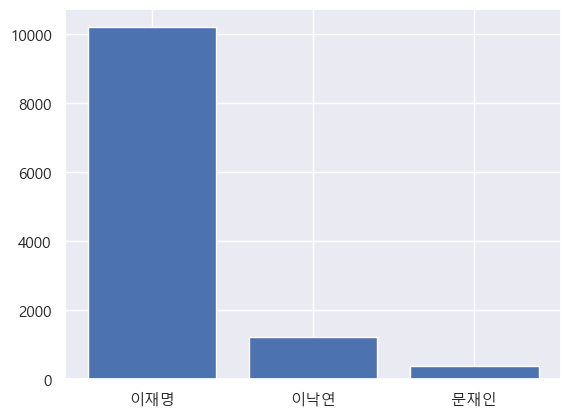

In [139]:
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False})
plt.bar(index, [i[1] for i in cand] )
plt.xticks(index, [i[0] for i in cand])

### 상위 100개 단어 워드클라우드

In [31]:
from wordcloud import WordCloud

In [125]:
wc = WordCloud(font_path="C:/study/fonts/NanumGothic.ttf", 
               background_color="white", width=2000, height=1000, 
               max_words=100,max_font_size=300)

In [126]:
wc.generate_from_frequencies(dict(noun_list))

In [127]:
wc.to_file("wordcloud.png")

In [128]:
import imageio

In [129]:
img = imageio.imread("wordcloud.png")

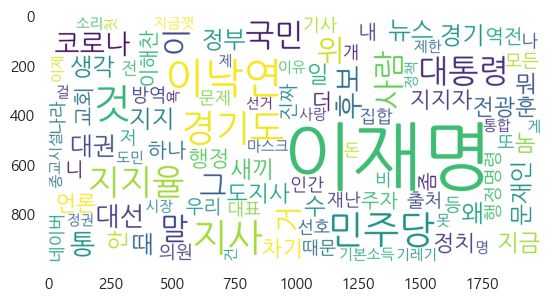

In [141]:
sns.set_style({'axes.grid' : False})
plt.imshow(img)

### 후보별 댓글 문장 분석

In [142]:
leej = okt.nouns("")
leen = okt.nouns("")
moon = okt.nouns("")

In [146]:
for i in range(len(twt.text)):
    if "이재명" in twt.text[i]:
        leej += okt.nouns(twt.text[i])
    if "이낙연" in twt.text[i]:
        leen += okt.nouns(twt.text[i])
    if "문재인" in twt.text[i]:
        moon += okt.nouns(twt.text[i])

In [152]:
len(moon)

6836

In [153]:
cnt1 = Counter(leej)
cnt2 = Counter(leen)
cnt3 = Counter(moon)

In [158]:
list1 = cnt1.most_common(100)
list2 = cnt2.most_common(100)
list3 = cnt3.most_common(100)

In [161]:
list1

[('이재명', 10208),
 ('이낙연', 1226),
 ('것', 1127),
 ('민주당', 1015),
 ('지사', 998),
 ('경기도', 944),
 ('지지율', 814),
 ('대통령', 718),
 ('사람', 685),
 ('국민', 657),
 ('이', 619),
 ('말', 616),
 ('위', 597),
 ('그', 586),
 ('후보', 580),
 ('거', 531),
 ('통', 514),
 ('코로나', 506),
 ('대선', 482),
 ('대권', 439),
 ('지지', 420),
 ('왜', 408),
 ('때', 405),
 ('뉴스', 404),
 ('경기', 401),
 ('생각', 394),
 ('새끼', 377),
 ('정부', 376),
 ('뭐', 375),
 ('일', 366),
 ('문재인', 364),
 ('지금', 363),
 ('수', 358),
 ('전광훈', 353),
 ('놈', 347),
 ('도지사', 345),
 ('차기', 339),
 ('정치', 338),
 ('지지자', 338),
 ('행정', 332),
 ('더', 327),
 ('언론', 320),
 ('교회', 310),
 ('안', 309),
 ('하나', 292),
 ('이해찬', 286),
 ('내', 271),
 ('역전', 270),
 ('좀', 267),
 ('진짜', 263),
 ('주자', 260),
 ('니', 259),
 ('우리', 249),
 ('출처', 244),
 ('방역', 244),
 ('행정명령', 240),
 ('기사', 235),
 ('저', 234),
 ('모든', 228),
 ('또', 227),
 ('의원', 225),
 ('때문', 222),
 ('등', 215),
 ('인간', 214),
 ('재난', 214),
 ('나라', 213),
 ('대표', 207),
 ('집합', 206),
 ('나', 205),
 ('개', 202),
 ('비', 202),
 ('네이버', 20

In [162]:
list2

[('이재명', 1423),
 ('이낙연', 1226),
 ('후보', 282),
 ('위', 277),
 ('지지율', 269),
 ('차기', 250),
 ('대권', 239),
 ('대선', 234),
 ('민주당', 230),
 ('대통령', 194),
 ('역전', 177),
 ('선호', 174),
 ('주자', 164),
 ('것', 147),
 ('사람', 139),
 ('첫', 137),
 ('의원', 125),
 ('지지', 109),
 ('행정', 108),
 ('문재인', 99),
 ('이', 99),
 ('전설', 99),
 ('국민', 92),
 ('갤럽', 88),
 ('지금껏', 85),
 ('통', 84),
 ('그', 82),
 ('대표', 79),
 ('정치', 78),
 ('하나', 78),
 ('의원님', 77),
 ('우리', 73),
 ('지사', 72),
 ('수', 71),
 ('여론조사', 71),
 ('뉴스', 63),
 ('정권', 63),
 ('지금', 63),
 ('제', 61),
 ('총리', 60),
 ('남자', 58),
 ('말', 57),
 ('지지자', 56),
 ('거', 54),
 ('조국', 54),
 ('하나로', 53),
 ('언론', 50),
 ('등', 48),
 ('일', 47),
 ('때', 46),
 ('보지', 46),
 ('유형', 46),
 ('뭐', 45),
 ('앞', 45),
 ('한국', 44),
 ('코로나', 44),
 ('생각', 43),
 ('마주', 43),
 ('전', 42),
 ('윤석열', 42),
 ('더', 42),
 ('이유', 41),
 ('통합', 41),
 ('부동산', 40),
 ('정부', 39),
 ('나라', 38),
 ('좀', 36),
 ('결과', 36),
 ('조사', 35),
 ('지층', 34),
 ('다음', 34),
 ('친', 34),
 ('출처', 33),
 ('지도자', 33),
 ('이해찬', 32),
 ('놈',

In [163]:
list3

[('이재명', 433),
 ('문재인', 364),
 ('대통령', 145),
 ('민주당', 109),
 ('이낙연', 102),
 ('것', 79),
 ('정부', 61),
 ('지지율', 53),
 ('이', 49),
 ('그', 48),
 ('지지', 46),
 ('사람', 43),
 ('지지자', 42),
 ('국민', 38),
 ('정권', 37),
 ('조국', 35),
 ('후보', 34),
 ('수', 31),
 ('지사', 30),
 ('통', 30),
 ('말', 29),
 ('더', 26),
 ('나라', 26),
 ('지금', 24),
 ('새끼', 24),
 ('정치', 23),
 ('대선', 22),
 ('코로나', 22),
 ('때', 22),
 ('이해찬', 21),
 ('도지사', 20),
 ('거', 19),
 ('뭐', 18),
 ('위', 18),
 ('대표', 18),
 ('놈', 18),
 ('생각', 17),
 ('노무현', 17),
 ('차기', 16),
 ('보수', 16),
 ('정책', 16),
 ('왜', 16),
 ('걸', 15),
 ('하나', 15),
 ('요', 15),
 ('존경', 15),
 ('한국', 14),
 ('건', 14),
 ('윤석열', 14),
 ('안철수', 14),
 ('기레기', 14),
 ('인간', 14),
 ('박원순', 14),
 ('전광훈', 14),
 ('욕', 14),
 ('빠', 14),
 ('대권', 13),
 ('주자', 13),
 ('이유', 13),
 ('일', 13),
 ('개', 13),
 ('전', 13),
 ('때문', 13),
 ('이제', 13),
 ('공격', 13),
 ('언론', 12),
 ('세력', 12),
 ('다음', 12),
 ('친문', 12),
 ('장관', 12),
 ('절대', 12),
 ('등', 12),
 ('똥', 12),
 ('질', 11),
 ('듯', 11),
 ('의원', 11),
 ('적폐', 11),
 ('

In [179]:
wc1 = WordCloud(font_path="C:/study/fonts/NanumGothic.ttf", 
               background_color="white", colormap='Set2', 
               width=2000, height=1000, max_words=100,max_font_size=300)
wc1.generate_from_frequencies(dict(list1))
wc1.to_file("wc1.png")

In [206]:
wc2 = WordCloud(font_path="C:/study/fonts/NanumGothic.ttf", 
               background_color="white", colormap='Set3_r',
               width=2000, height=1000, max_words=100,max_font_size=300)
wc2.generate_from_frequencies(dict(list2))
wc2.to_file("wc2.png")

In [210]:
wc3 = WordCloud(font_path="C:/study/fonts/NanumGothic.ttf", 
               background_color="white", colormap='Set2_r',
               width=2000, height=1000, max_words=100,max_font_size=300)
wc3.generate_from_frequencies(dict(list3))
wc3.to_file("wc3.png")

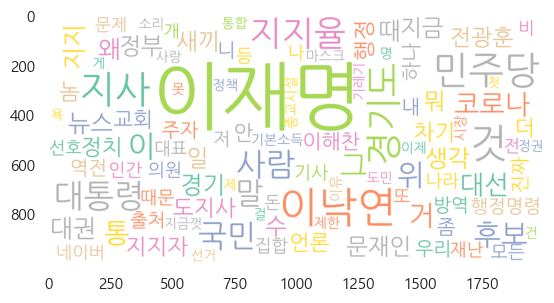

In [211]:
img1 = imageio.imread("wc1.png")
plt.imshow(img1)

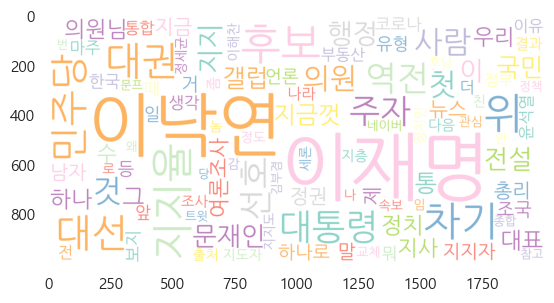

In [212]:
img2 = imageio.imread("wc2.png")
plt.imshow(img2)

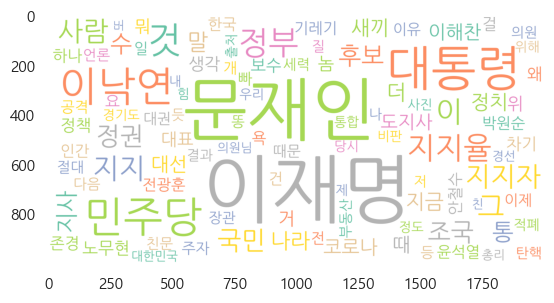

In [213]:
img3 = imageio.imread("wc3.png")
plt.imshow(img3)